# Task 1
## Principal Component Analysis

In [18]:
import copy

import numpy as np

from pca import *

Read and plot the data

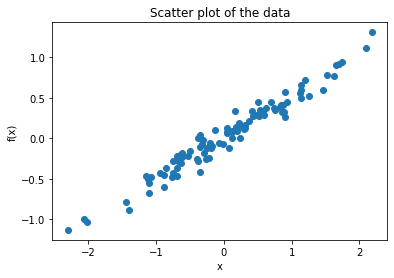

In [19]:
# plot the data
data = read_data()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.show()

Center the data and plot the centered data vs the original one

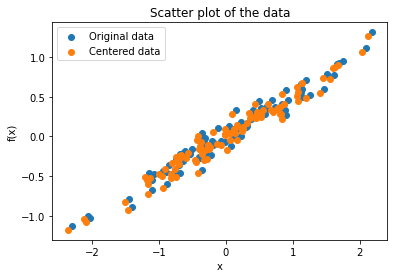

In [20]:
# plot the centered data vs the original one
centered_data = center_data(data)
plt.scatter(data[:, 0], data[:, 1], color='tab:blue', label='Original data')
plt.scatter(centered_data[:, 0], centered_data[:, 1], color='tab:orange', label='Centered data')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.legend()
plt.show()


SVD decomposition of the (centered) data

In [21]:
# SVD decomposition
U, S, V = svd(centered_data, center=False)

# check that "data" can be reconstructed from U, S and Vt
print("Norm of the difference between the centered data and its reconstruction through SVD: ",
      np.linalg.norm(centered_data - U @ S @ V.T))

Norm of the difference between the centered data and its reconstruction through SVD:  5.175015341989463e-15


The difference of between the centered data and its reconstruction
through the SVD is very small, therefore we can state that the SVD
is computed correctly.

How much energy is contained into each of the 2 components?

In [22]:
sigma1, sigma2 = S[0, 0], S[1, 1]
tot = sigma1 + sigma2
perc_energy_sigma1 = sigma1 * 100 / tot
perc_energy_sigma2 = sigma2 * 100 / tot
print(f"sigma1 contains {round(perc_energy_sigma1, 2)}% of the energy")
print(f"sigma2 contains {round(perc_energy_sigma2, 2)}% of the energy")

sigma1 contains 92.33% of the energy
sigma2 contains 7.67% of the energy


Plot the (centered) data its 2 principal components

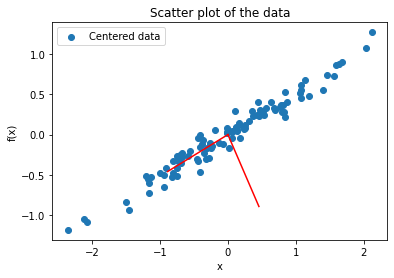

In [23]:
# scatter plot of the centered data
plt.scatter(centered_data[:, 0], centered_data[:, 1], label='Centered data')

# plot the 2 principal components as vectors
origin = np.mean(centered_data, axis=0)
m1, q1 = get_lines_along_principal_directions(pt1=origin, pt2=V[:, 0])
m2, q2 = get_lines_along_principal_directions(pt1=origin, pt2=V[:, 1])
# plt.scatter(V[:, 0], V[:, 1], color='red')
# plt.scatter(origin, origin, color='green')
# print(V[:, 0], V[:, 1])

# x = np.arange(-2, 2, 0.1)
# plt.plot(x, m1 * x + q1, color='g')
# x = np.arange(-0.5, 0.5, 0.1)
# plt.plot(x, m2 * x + q2, color='g')

x_values = [origin[0], V[:, 0][0]]
y_values = [origin[1], V[:, 0][1]]
plt.plot(x_values, y_values, color='r')

x_values = [origin[0], V[:, 1][0]]
y_values = [origin[1], V[:, 1][1]]
plt.plot(x_values, y_values, color='r')

# US = U @ S
# x_values = [origin[0], origin[0] + U[0, 0] * S[0, 0]]
# y_values = [origin[1], origin[1] + U[1, 0] * S[0, 0]]
# plt.plot(x_values, y_values, color='r')
#
# x_values = [origin[0], origin[0] + U[0, 1] * S[1, 1]]
# y_values = [origin[1], origin[1] + U[1, 1] * S[1, 1]]
# plt.plot(x_values, y_values, color='r')

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.legend()
plt.show()

### Part 2

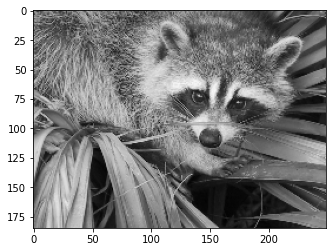

In [24]:
# Load and display the image of the racoon
racoon = load_racoon(display=True)

Apply PCA to the image and visualize the reconstruction

In [25]:
# SVD decomposition of the image
U, S, V = svd(racoon.T)       # transpose because the data points are the columns of the image

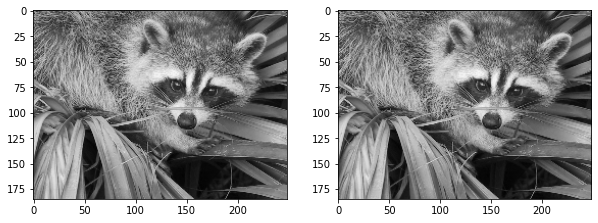

In [26]:
# show reconstruction with all the principal components
reconstruction = (U @ S @ V.T).T    # transpose because the SVD has been applied to the transpose of the original image
show_2_images_grayscale(racoon, reconstruction)

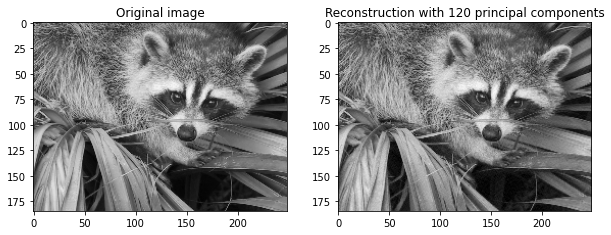

In [27]:
# show reconstruction with 120 principal components
S_120 = copy.deepcopy(S)
S_120[120:, 120:] = 0
reconstruction = (U @ S_120 @ V.T).T    # transpose because the SVD has been applied to the transpose of the original image
show_2_images_grayscale(racoon, reconstruction, titles=("Original image", "Reconstruction with 120 principal components"))

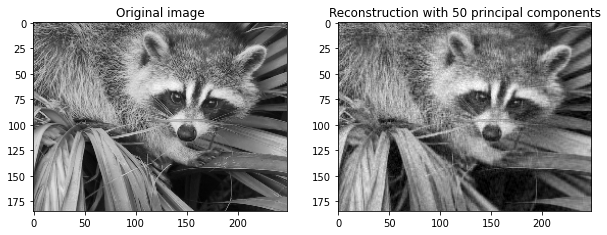

In [28]:
# show reconstruction with 50 principal components
S_50 = copy.deepcopy(S)
S_50[50:, 50:] = 0
reconstruction = (U @ S_50 @ V.T).T    # transpose because the SVD has been applied to the transpose of the original image
show_2_images_grayscale(racoon, reconstruction, titles=("Original image", "Reconstruction with 50 principal components"))


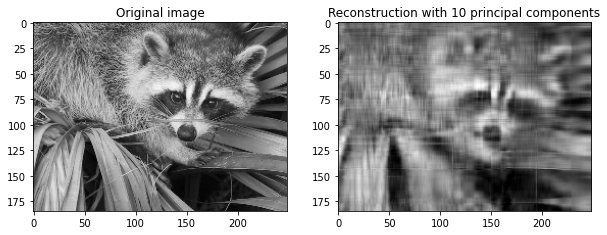

In [29]:
# show reconstruction with 10 principal components
S_10 = copy.deepcopy(S)
S_10[10:, 10:] = 0
reconstruction = (U @ S_10 @ V.T).T    # transpose because the SVD has been applied to the transpose of the original image
show_2_images_grayscale(racoon, reconstruction, titles=("Original image", "Reconstruction with 10 principal components"))

Check at what point the energy loss is grater than 1%

In [31]:
# compute the percentage of the total energy captured by a different number of singular values
singular_values = np.diagonal(S)

energy_120 = np.sum(np.square(singular_values[:120])) / np.sum(np.square(singular_values))
energy_50 = np.sum(np.square(singular_values[:50])) / np.sum(np.square(singular_values))
energy_10 = np.sum(np.square(singular_values[:10])) / np.sum(np.square(singular_values))

print(f"The energy captured in the first 120 singular values is the {round(energy_120 * 100, 2)}% of the total")
print(f"The energy captured in the first 50 singular values is the {round(energy_50 * 100, 2)}% of the total")
print(f"The energy captured in the first 10 singular values is the {round(energy_10 * 100, 2)}% of the total")

The energy captured in the first 120 singular values is the 99.86% of the total
The energy captured in the first 50 singular values is the 98.84% of the total
The energy captured in the first 10 singular values is the 95.76% of the total
